# Decision Trees & Boundaries

# Exercises

1. Using a dataset of your choice, can you test **dtreeviz** for a regression problem?
2. Can you visualize your tree using sklearn **plot_tree** method or **graphviz**? ([Solution](https://mljar.com/blog/visualize-decision-tree/))
3. Are you able to create an animation of a decision boundary fitting to the data during the training process? [Here are](https://paulvanderlaken.com/2020/01/20/animated-machine-learning-classifiers/) some possible examples of animations. [celluloid](https://github.com/jwkvam/celluloid) could be of help.

In [1]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 2.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("housing.csv")
df = pd.get_dummies(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [4]:
df = df.dropna()[:1000]
X = df.drop(['median_house_value'], axis = 1)
Y = df['median_house_value']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, 
                                                    random_state = 101)

sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

1. Using a dataset of your choice, can you test dtreeviz for a regression problem?

RMSE:  57304.15035668641


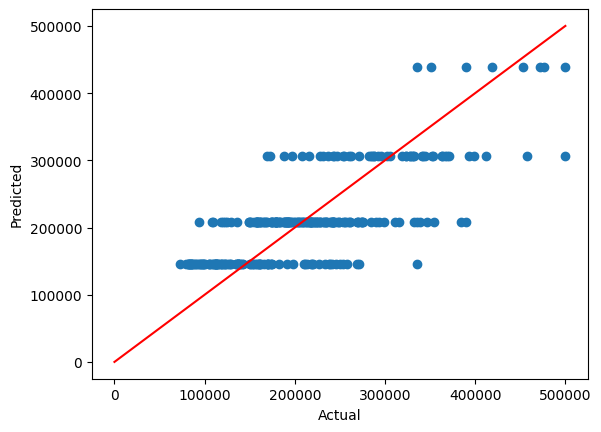

In [5]:
regr = DecisionTreeRegressor(random_state=0, max_depth=2).fit(X_Train, Y_Train)
y_test_pred = regr.predict(X_Test)

print("RMSE: ", mean_squared_error(Y_Test, y_test_pred, squared=False)) # Using RMSE
plt.scatter(Y_Test, y_test_pred)
plt.plot([0, 500000], [0, 500000], color='r', linestyle='-')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

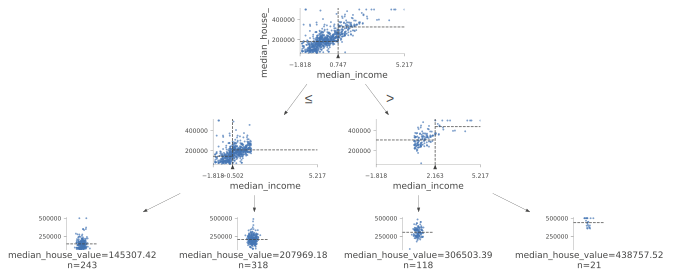

In [6]:
import dtreeviz as dtv
# avoid "Arial font not found warnings"
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

viz = dtv.model(regr,
               X_Train,
               Y_Train,
               target_name='median_house_value',
               feature_names=list(X.columns))

v = viz.view()    
v.save("dtreeviz.svg") 
viz.view()

2. Can you visualize your tree using sklearn plot_tree method or graphviz?

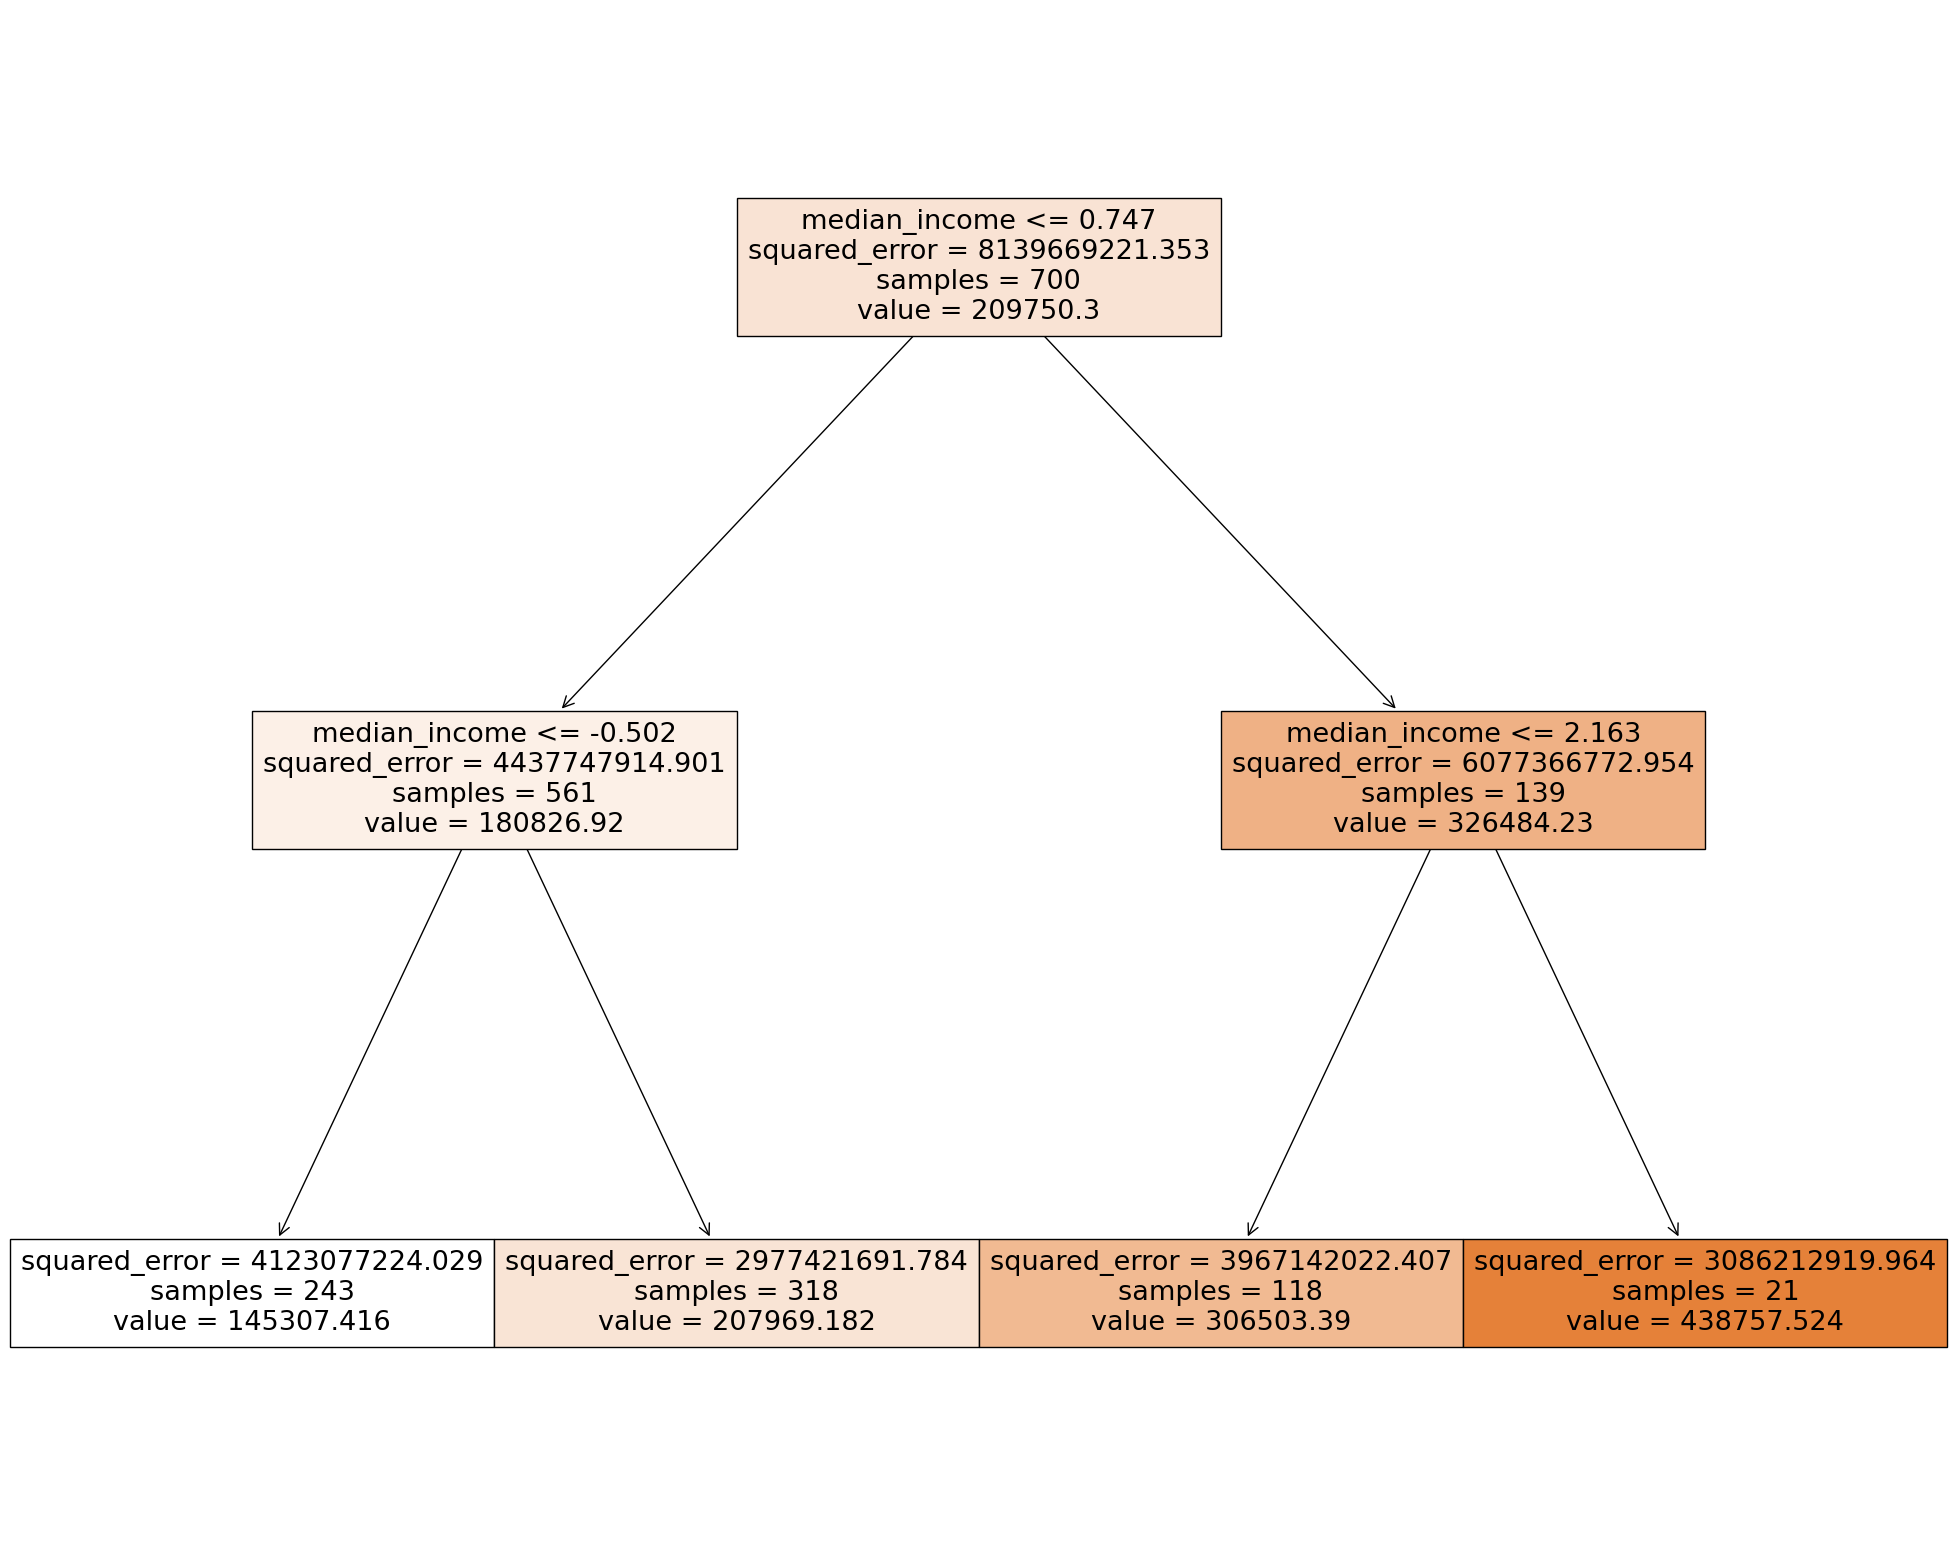

In [7]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, 
                   feature_names=list(X.columns),  
                   class_names=list(Y.unique()),
                   filled=True)

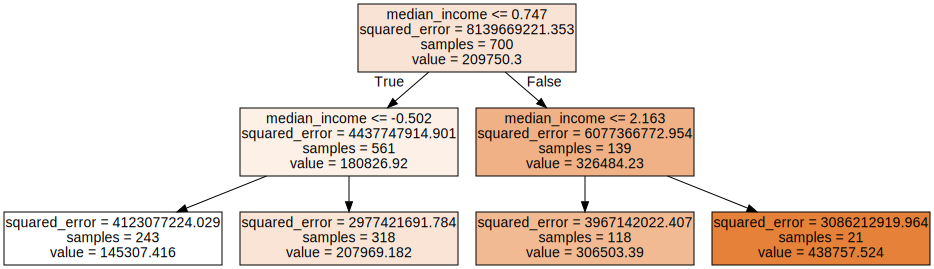

In [8]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=list(X.columns),  
                                class_names=list(Y.unique()),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

3. Are you able to create an animation of a decision boundary fitting to the data during the training process? [Here are](https://paulvanderlaken.com/2020/01/20/animated-machine-learning-classifiers/) some possible examples of animations. [celluloid](https://github.com/jwkvam/celluloid) could be of help.

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML

# Using Iris classification dataset from: https://archive.ics.uci.edu/ml/datasets/iris
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[:, [0,2]].values
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=['X1', 'X2', 'Y'])
df['Y'] = df['Y'].astype('int64')
df.head()

,X1,X2,Y
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [10]:
# Simple Logistic Regression from scratch

def sigmoid(beta0, beta1, beta2, X1, X2):
    linreg = beta0 + beta1*X1 + beta2*X2
    prediction = 1/(1 + np.exp(-linreg))
    return prediction


def update_coefficients(beta0, beta1, beta2, X1, X2, Y, prediction, 
                        learn_rate, intercept_bias):
    beta0 = beta0 + learn_rate*(Y-prediction)*prediction*(1-prediction)*intercept_bias
    beta1 = beta1 + learn_rate*(Y-prediction)*prediction*(1-prediction)*X1
    beta2 = beta2 + learn_rate*(Y-prediction)*prediction*(1-prediction)*X2
    
    return beta0, beta1, beta2

  
def sgd(df, epochs=1, learn_rate=0.3, intercept_bias= 1, cutoff=0.5):
    beta0 = 0.0
    beta1, beta2 = 0.0, 0.0
    b_history = []
    w_history = []

    for i in range(1,epochs+1):
        
        correct_predictions = 0
        
        for n in range(len(df)):

            X1 = df.iloc[n,0]
            X2 = df.iloc[n,1]
            Y = df.iloc[n,2]

            prediction = sigmoid(beta0, beta1, beta2, X1, X2)

            beta0, beta1, beta2 = update_coefficients(beta0, beta1, beta2, X1, X2, Y, prediction, 
                                                      learn_rate, intercept_bias)
            
            if prediction < cutoff:
                class_ = 0
            else:
                class_ = 1
                
            if class_ == Y:
                correct_predictions+=1
            else:
                continue

        b_history.append(beta0)
        w_history.append([beta1, beta2])
        accuracy = (correct_predictions/len(df))*100

    print('Accuracy: ' + str(accuracy))

    return b_history, w_history

b_history, w_history = sgd(df, epochs=50, learn_rate=0.7, intercept_bias=3)

Accuracy: 100.0


In [11]:
# Demonstration in plain matplotlib

X1 = df.iloc[:,0]
X2 = df.iloc[:,1]
Y = df.iloc[:,2]

fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlim([X1.min() - 2, X1.max() + 2])
ax.set_ylim([X2.min() - 2, X2.max() + 2])
ax.set_xlabel('X1', size=18)
ax.set_ylabel('X2', size=18)
ax.scatter(X1, X2, s = 100, c = np.array(['r', 'b'])[Y])
lines, = ax.plot([], [], c='black')

def animate(iter):
  xs = np.array([X1.min() - 2, X1.max() + 2])
  ys = (-w_history[iter][0] * xs - b_history[iter])/w_history[iter][1]
  lines.set_data(xs, ys)
  ax.set_title('Decision boundary (Iteration: ' + str(iter) + ')', size = 20)

anim = animation.FuncAnimation(fig, animate, len(w_history))
writergif = animation.PillowWriter(fps=500)
anim.save('logistic_animation.gif',writer=writergif)
html = HTML(anim.to_jshtml())
display(html)
plt.close()

As an extra, are you able to create animations also for the gradient descent process? You can find [some examples here.](http://saitcelebi.com/tut/output/part1.html)